In [98]:
import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('energy.csv')
df['EDP'] = df['Energy (J)'] * df['Runtime (s)']

In [100]:
palette = sns.color_palette('viridis', len(df['Algorithm'].unique()))
examples = df.groupby('Example')

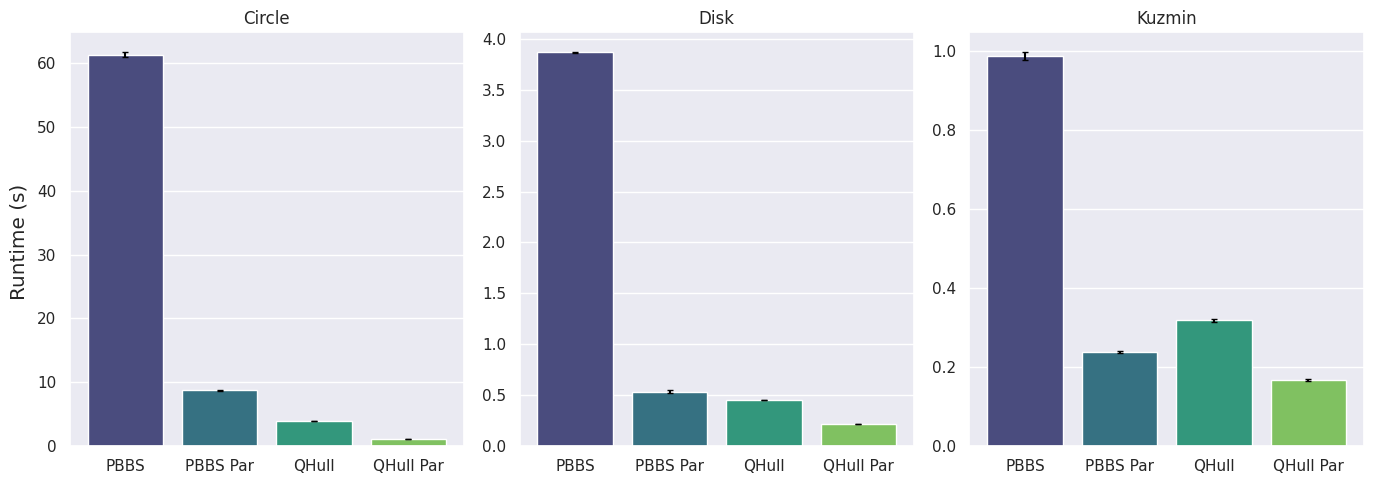

In [101]:
fig, axs = plt.subplots(1, len(examples), figsize=(14,5))

for (example_name, example_df), ax in zip(examples, axs):
    example_df.reset_index(inplace=True)
    sns.barplot(example_df, x='Algorithm', y='Runtime (s)', hue='Algorithm', legend=False, palette=palette, ax=ax)
    ax.errorbar(example_df.index, example_df['Runtime (s)'], yerr=example_df['Runtime SD'], ecolor='black', fmt='none', capsize=2)
    ax.set_title(example_name)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

fig.supylabel('Runtime (s)')
fig.tight_layout()
plt.show()

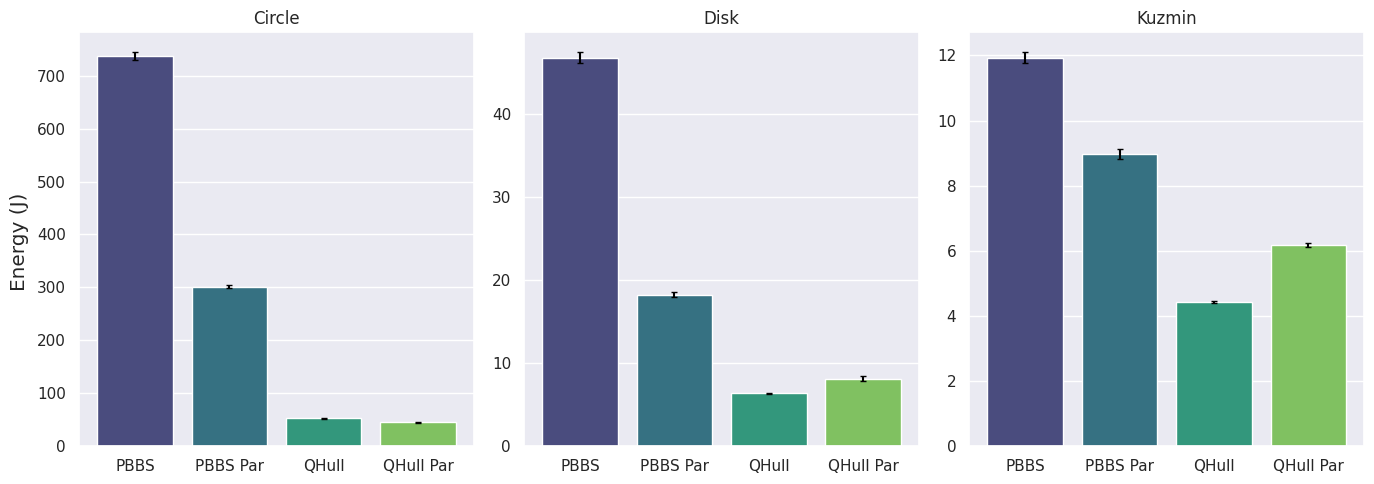

In [102]:
fig, axs = plt.subplots(1, len(examples), figsize=(14,5))

for (example_name, example_df), ax in zip(examples, axs):
    example_df.reset_index(inplace=True)
    sns.barplot(example_df, x='Algorithm', y='Energy (J)', hue='Algorithm', legend=False, palette=palette, ax=ax)
    ax.errorbar(example_df.index, example_df['Energy (J)'], yerr=example_df['Energy SD'], ecolor='black', fmt='none', capsize=2)
    ax.set_title(example_name)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

fig.supylabel('Energy (J)')
fig.tight_layout()
plt.show()

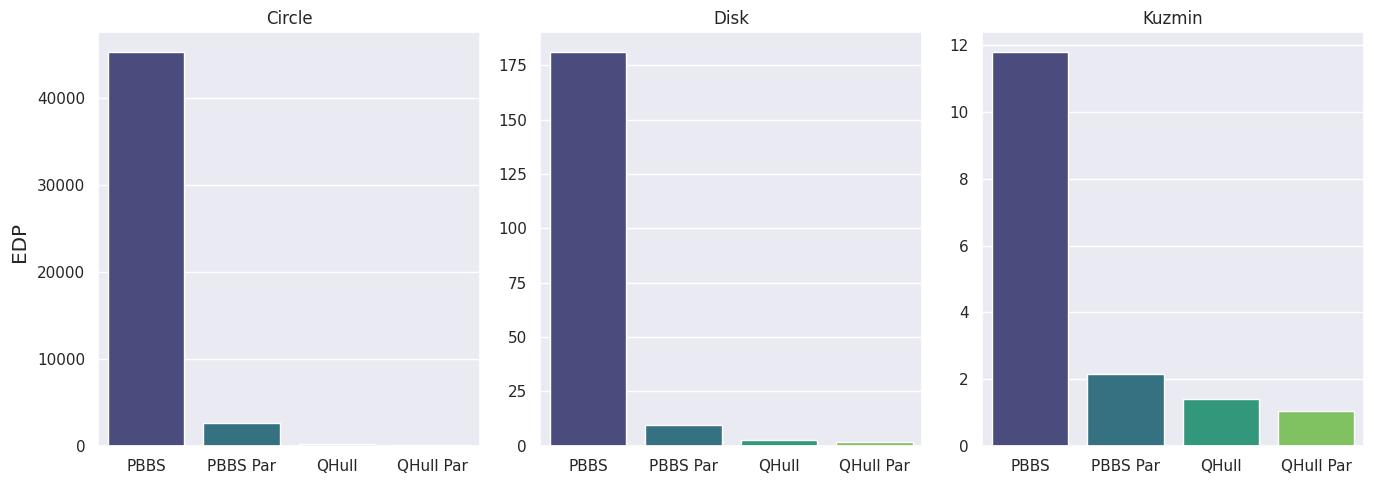

In [103]:
fig, axs = plt.subplots(1,len(examples), figsize=(14,5))

for (example_name, example_df), ax in zip(examples, axs):
    sns.barplot(example_df, x='Algorithm', y='EDP', hue='Algorithm', legend=False, palette=palette, ax=ax)
    ax.set_title(example_name)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

fig.supylabel('EDP')
fig.tight_layout()
plt.show()